### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
from datetime import datetime

### Load in all dataframes

In [134]:
beh_key = {1: "Nesting", 2: "Playing w/ Ball", 3: "Playing w/ Box", 4 : "Riding the Ball", 5: "Riding the Box", 6 : "Drinking", 7 : "Chewing", 8 : "Porthole Interaction", 9 : "Scaling Porthole", 10 : "Scaling Door", 11 : "Grooming", 12 : "Hollowing/Digging", 13 : "Locomotion", 14 : "Minor Postural Movement", 15 : "Rearing", 16 : "Stretching", 17 : "Twitching", 18 : "Slipping"}

In [182]:
beh_all = ["Nesting", "Playing w/ Ball", "Playing w/ Box", "Riding the Ball", "Riding the Box", "Drinking", "Chewing", "Porthole Interaction", "Scaling Porthole", "Scaling Door", "Grooming", "Hollowing/Digging", "Locomotion", "Minor Postural Movement", "Rearing", "Stretching", "Twitching", "Slipping"]

In [ ]:
def cat_num(df):
    #encode
    df.Behavior[df.Behavior=='Nesting'] = 1 # Location
    df.Behavior[df.Behavior=='Playing w/ Ball'] = 2 # Location
    df.Behavior[df.Behavior=='Playing w/ Box'] = 3 # Location
    df.Behavior[df.Behavior=='Riding the Ball'] = 4 # Location
    df.Behavior[df.Behavior=='Riding the Box'] = 5 # Location
    df.Behavior[df.Behavior=='Drinking'] = 6 # Location
    df.Behavior[df.Behavior=='Chewing'] = 7 # Location
    df.Behavior[df.Behavior=='Porthole Interaction'] = 8 # Location
    df.Behavior[df.Behavior=='Scaling Porthole'] = 9 #Location
    df.Behavior[df.Behavior=='Scaling Door'] = 10 #Location
    
    df.Behavior[df.Behavior=='Grooming'] = 11
    
    df.Behavior[df.Behavior=='Hollowing/Digging'] = 12
    df.Behavior[df.Behavior=='Digging'] = 12
    
    df.Behavior[df.Behavior=='Locomotion'] = 13
    df.Behavior[df.Behavior=='Locomotive Movement'] = 13
    
    df.Behavior[df.Behavior=='Minor Postural Movement'] = 14
    df.Behavior[df.Behavior=='Rearing'] = 15
    df.Behavior[df.Behavior=='Stretching'] = 16
    df.Behavior[df.Behavior=='Twitching'] = 17
    df.Behavior[df.Behavior=='Slipping'] = 18
    
    #drop all nonbehaviors
    df = df[df.Behavior.apply(lambda x: str(x).isnumeric())]
    
    return df

In [135]:
mice_names = ["CAF34", "CAF42", "CAF69", "CAF77", "CAF99", "CAF106", "EAB50"]

In [136]:
#opens all annotations
def open_annotations(mouse_name):
    filename = f'files/{mouse_name}_loc_df'
    infile = open(filename,'rb')
    loc_df = pickle.load(infile)
    infile.close()
    
    filename = f'files/{mouse_name}_reg_df'
    infile = open(filename,'rb')
    reg_df = pickle.load(infile)
    infile.close()
    
    return loc_df, reg_df

In [197]:
axis_info = {"behavior" : [], "duration" : [], "dataset_name" : []}

### Creating New Dataframe with Duration

In [198]:
def extract_duration(df):
    behavior = []
    duration = []
    
    for i in range(0, len(df), 2):
        initial = df["Time"].iloc[i]
        final = df["Time"].iloc[i+1]
        
        delta = final - initial
        
        encoded = df["Behavior"].iloc[i]
        
        behavior.append(beh_key[encoded])
        duration.append(delta)
        
    return behavior, duration

In [199]:
for mouse in mice_names:
    loc_df, reg_df = open_annotations(mouse)
    
    loc_behavior, loc_duration = extract_duration(loc_df)
    reg_behavior, reg_duration = extract_duration(reg_df)
    
    axis_info["behavior"].extend(loc_behavior)
    axis_info["duration"].extend(loc_duration)
    axis_info["dataset_name"].extend([mouse] * len(loc_behavior))
    
    axis_info["behavior"].extend(reg_behavior)
    axis_info["duration"].extend(reg_duration)
    axis_info["dataset_name"].extend([mouse] * len(reg_behavior))

In [203]:
df = pd.DataFrame(axis_info)
df[df["duration"] == df["duration"].min()]["duration"]

126    0.133
Name: duration, dtype: float64

### Plots

[Text(0, 0, 'Porthole Interaction'),
 Text(1, 0, 'Nesting'),
 Text(2, 0, 'Playing w/ Ball'),
 Text(3, 0, 'Riding the Ball'),
 Text(4, 0, 'Playing w/ Box'),
 Text(5, 0, 'Riding the Box'),
 Text(6, 0, 'Scaling Porthole'),
 Text(7, 0, 'Locomotion'),
 Text(8, 0, 'Slipping'),
 Text(9, 0, 'Rearing'),
 Text(10, 0, 'Grooming'),
 Text(11, 0, 'Hollowing/Digging'),
 Text(12, 0, 'Chewing'),
 Text(13, 0, 'Drinking'),
 Text(14, 0, 'Minor Postural Movement'),
 Text(15, 0, 'Scaling Door'),
 Text(16, 0, 'Twitching')]

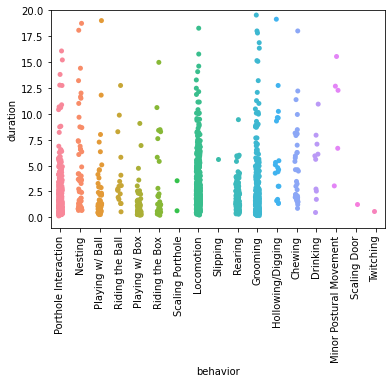

In [156]:
ax = sns.stripplot(x = "behavior", y = "duration", data = df)
ax.set_ylim([-1, 20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

(-1.0, 20.0)

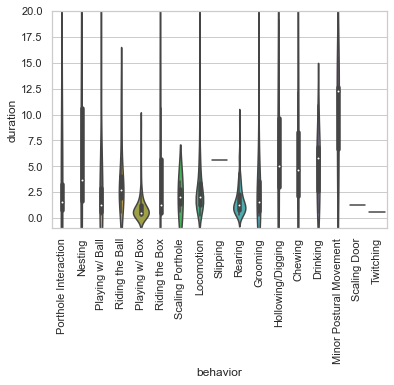

In [179]:
ax = sns.violinplot(x = "behavior", y = "duration", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim([-1, 20])

(-1.0, 20.0)

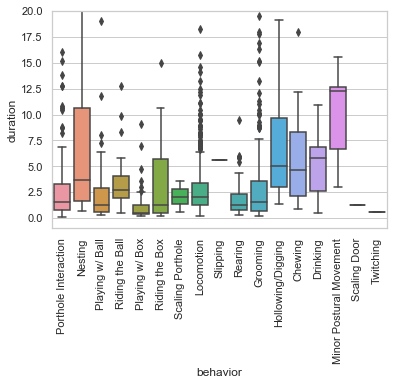

In [180]:
ax = sns.boxplot(x = "behavior", y = "duration", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim([-1, 20])

### analysis

In [208]:
shortest_duration = dict.fromkeys(beh_all)

In [209]:
for beh in beh_all:
    beh_list = df[df["behavior"] == beh]["duration"].values.tolist()
    shortest_duration[beh] = sorted(beh_list)[:5]

In [210]:
shortest_duration

{'Nesting': [0.6669999999999163,
  0.66700000000003,
  0.6999999999999886,
  0.7999999999999545,
  0.8329999999996289],
 'Playing w/ Ball': [0.26600000000000534,
  0.2669999999999959,
  0.33400000000006,
  0.40000000000009095,
  0.40000000000009095],
 'Playing w/ Box': [0.20000000000004547,
  0.23299999999994725,
  0.2659999999999627,
  0.2669999999998254,
  0.2669999999998254],
 'Riding the Ball': [0.5339999999998781,
  1.33299999999997,
  1.3330000000000837,
  1.7329999999999472,
  1.9329999999999927],
 'Riding the Box': [0.20000000000004547,
  0.26700000000005275,
  0.33299999999997,
  0.33399999999983265,
  0.33399999999983265],
 'Drinking': [0.4659999999998945,
  1.7330000000001746,
  2.5329999999999018,
  2.73299999999972,
  5.599999999999909],
 'Chewing': [0.8659999999999854,
  1.2330000000001746,
  1.433999999999969,
  1.5,
  1.599999999999909],
 'Porthole Interaction': [0.13299999999981083,
  0.20000000000004547,
  0.26599999999962165,
  0.2669999999998254,
  0.267000000000280